In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CompanyData.csv')

## Data cleaning

In [4]:
df.isna().sum()

Klient                0
Netto                 0
VAT                 670
Brutto                0
Koszt                 0
COUNTA z Klient       0
Ilość                 0
Zysk                  0
Marża              1193
tenure              670
quit                670
dtype: int64

In [5]:
# Replace commas with dots in columns
df[['VAT', 'Marża', 'Netto', 'Brutto', 'Koszt', 'Ilość', 'Zysk', 'tenure']] = df[['VAT', 'Marża', 'Netto', 'Brutto', 'Koszt', 'Ilość', 'Zysk', 'tenure']].apply(lambda x: x.str.replace(',', '.')).astype(float)

In [6]:
# Convert VAT column to numeric, forcing errors to NaN
df['VAT'] = pd.to_numeric(df['VAT'], errors='coerce')
# Convert Marża column to numeric, forcing errors to NaN
df['Marża'] = pd.to_numeric(df['Marża'], errors='coerce')
# Fill NaN values with the mean of the VAT column
df['VAT'] = df['VAT'].fillna(df['VAT'].mean())
df['Marża'] = df['Marża'].fillna(df['Marża'].mean())

In [7]:
df.isna().sum()

Klient               0
Netto                0
VAT                  0
Brutto               0
Koszt                0
COUNTA z Klient      0
Ilość                0
Zysk                 0
Marża                0
tenure             670
quit               670
dtype: int64

In [8]:
# Drop remaining NaN values
df = df.dropna()
df.isna().sum()

Klient             0
Netto              0
VAT                0
Brutto             0
Koszt              0
COUNTA z Klient    0
Ilość              0
Zysk               0
Marża              0
tenure             0
quit               0
dtype: int64

In [16]:
df = df.drop(['Klient'], axis=1)
df.head()

,Netto,VAT,Brutto,Koszt,COUNTA z Klient,Ilość,Zysk,Marża,tenure,quit
0,106.00,24.38,130.38,41.40,1,0.0,0.0,54.58879,0.0,1.0
2,184.00,42.32,226.32,73.32,1,0.0,0.0,54.58879,0.0,1.0
3,626.20,144.03,770.23,284.52,1,0.0,0.0,54.58879,0.0,1.0
4,73.01,16.79,89.80,45.00,1,0.0,0.0,54.58879,0.0,1.0
6,880.00,202.40,1082.40,311.48,1,0.0,0.0,54.58879,0.0,0.0


## Regression model

In [19]:
# Podzielenie danych na zmienne objaśniające (X) i cel (y)
X = df[['Marża', 'COUNTA z Klient', 'Ilość', 'tenure']]
y = df['Zysk']


In [21]:
# Podzielenie danych na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie danych wejściowych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Skalowanie zmiennej docelowej
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


In [23]:
# Tworzenie modelu ANN
model = Sequential()
model.add(Dense(32, input_dim=4, activation='relu'))  # Zwiększona liczba neuronów w warstwie wejściowej
model.add(Dropout(0.3))                              # Większy dropout dla lepszej regularizacji
model.add(Dense(16, activation='relu'))               # Dodanie kolejnej warstwy ukrytej
model.add(Dense(8, activation='relu'))                # Jeszcze jedna warstwa ukryta dla większej złożoności
model.add(Dense(1))                                   # Warstwa wyjściowa

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Trenowanie modelu
history = model.fit(X_train_scaled, y_train_scaled, epochs=500, validation_data=(X_test_scaled, y_test_scaled), verbose=1, callbacks=[early_stopping])


Epoch 1/500


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0709 - val_loss: 0.0018
Epoch 2/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1213 - val_loss: 0.0100
Epoch 3/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 - val_loss: 0.0033
Epoch 4/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - val_loss: 0.0020
Epoch 5/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0220 - val_loss: 0.0016
Epoch 6/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 - val_loss: 0.0012
Epoch 7/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 - val_loss: 0.0012
Epoch 8/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 9/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0709 - val_loss: 0.0031
Epoch 10/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 11/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 12/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

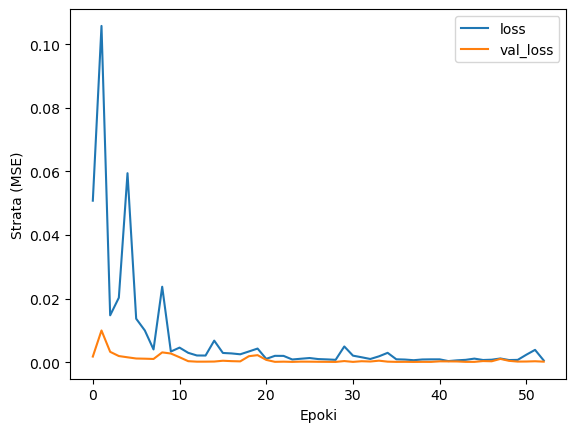

In [24]:
# Wizualizacja strat podczas trenowania
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoki')
plt.ylabel('Strata (MSE)')
plt.legend()
plt.show()

In [25]:
# Predykcja na podstawie danych testowych
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Wyświetlenie wyników
for real, pred in zip(y_test, y_pred):
    print(f"Rzeczywisty Zysk: {real}, Przewidywany Zysk: {pred[0]}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Rzeczywisty Zysk: 224.5, Przewidywany Zysk: -362.4592590332031
Rzeczywisty Zysk: 50.89, Przewidywany Zysk: -393.7538757324219
Rzeczywisty Zysk: 35.24, Przewidywany Zysk: -389.4654235839844
Rzeczywisty Zysk: 15855.64, Przewidywany Zysk: 3534.626220703125
Rzeczywisty Zysk: 28.01, Przewidywany Zysk: -401.80352783203125
Rzeczywisty Zysk: 87.38, Przewidywany Zysk: -148.4485626220703
Rzeczywisty Zysk: 36.91, Przewidywany Zysk: -386.8240661621094
Rzeczywisty Zysk: 4384.4, Przewidywany Zysk: 3534.626220703125
Rzeczywisty Zysk: 83.2, Przewidywany Zysk: -362.8107604980469
Rzeczywisty Zysk: 0.0, Przewidywany Zysk: 3534.626220703125
Rzeczywisty Zysk: 118.45, Przewidywany Zysk: 3534.626220703125
Rzeczywisty Zysk: 39.33, Przewidywany Zysk: -337.6224060058594
Rzeczywisty Zysk: 45.1, Przewidywany Zysk: -408.3567199707031
Rzeczywisty Zysk: 95.79, Przewidywany Zysk: -398.3436279296875
Rzeczywisty Zysk: 530.82, Przewidywany Zysk: -310.6262512207031
Rzeczywisty Zysk:

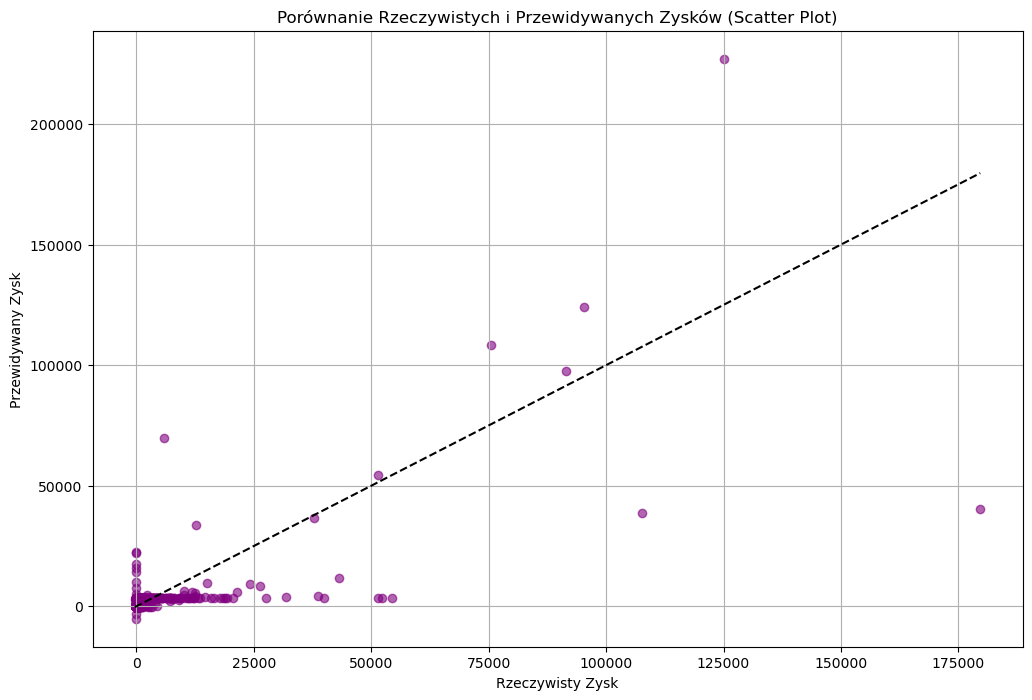

In [26]:
# Wykres porównujący rzeczywiste i przewidywane zyski w formie wykresu punktowego ze zgrupowaniem dla lepszej czytelności
plt.figure(figsize=(12, 8))
plt.scatter(y_test.values, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Rzeczywisty Zysk')
plt.ylabel('Przewidywany Zysk')
plt.title('Porównanie Rzeczywistych i Przewidywanych Zysków (Scatter Plot)')
plt.grid()
plt.show()


In [27]:
from sklearn.metrics import r2_score

# Obliczenie dokładności modelu (R^2 score)
r2 = r2_score(y_test, y_pred)
print(f"Dokładność modelu (R^2 score): {r2:.2f}")

Dokładność modelu (R^2 score): 0.43
